# Project: Swing Trading Methods

In [41]:
# project dependencies
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
from collections import Counter
from datetime import datetime
plt.style.use('fivethirtyeight')

In [42]:
# Definition of the query below: 
# URL >> https://query1.finance.yahoo.com/v8/finance/chart/{$symbol}?range={$range}&interval={$interval}
# symbol >> the stock ticker symbol, e.g. AAPL for Apple
# range >> the desired range of the query, allowed parameters are [1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max]
# interval >> the desired interval of the quote, e.g. every 5 minutes, allowed parameters are [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
# https://finance.yahoo.com/quote/AAPL/history?period1=1592006400&period2=1592438400&interval=1d&filter=history&frequency=1d

base_url= "https://query1.finance.yahoo.com/v8/finance/chart/"
def createUrl(symb, rng, interval):
    return base_url+symb+'?'+"range="+rng+"&interval="+interval


### Creating first test case by initiating the first dataframe

In [71]:
endpoint=createUrl("aapl", "6mo", "1d")
req = requests.get(endpoint)
rawJson = req.json()

indicators= list(rawJson["chart"]["result"][0]) #indicators 
raw_data=rawJson['chart']['result'][0][indicators[2]]['quote'][0] #this is the values we are looking for 
column_name=list(raw_data.keys()) #collumn names we need 

#coverting the epoch time
def covnertTime(val):
    x = datetime.fromtimestamp(val)    
    return x
timestamps = list(map(lambda val: covnertTime(val), rawJson["chart"]["result"][0]["timestamp"]))
column_name.insert(0,"timestamp")

df = pd.DataFrame(columns=column_name)  #dataframe 
df[column_name[0]] = timestamps
df[column_name[1]] = raw_data['close']
df[column_name[2]] = raw_data['high']
df[column_name[3]] = raw_data['open']
df[column_name[4]] = raw_data['volume']
df[column_name[5]] = raw_data['low']

df

timestamp       close         low        open    volume  \
0   2019-12-23 09:30:00  284.000000  284.250000  280.529999  24643000   
1   2019-12-24 09:30:00  284.269989  284.890015  284.690002  12119700   
2   2019-12-26 09:30:00  289.910004  289.980011  284.820007  23280300   
3   2019-12-27 09:30:00  289.799988  293.970001  291.119995  36566500   
4   2019-12-30 09:30:00  291.519989  292.690002  289.459991  36028600   
..                  ...         ...         ...         ...       ...   
121 2020-06-17 09:30:00  351.589996  355.399994  355.149994  28532000   
122 2020-06-18 09:30:00  351.730011  353.450012  351.410004  24205100   
123 2020-06-19 09:30:00  349.720001  356.559998  354.640015  66119000   
124 2020-06-22 09:30:00  358.869995  359.459991  351.339996  33719700   
125 2020-06-23 13:16:34  370.019989  370.539886  364.000000  27930262   

           high  
0    280.369995  
1    282.920013  
2    284.700012  
3    288.119995  
4    285.220001  
..          ...  
121  351.089996  
122  349.220001  
123  345.149994  
124  351.149994  
125  362.276703  

[126 rows x 6 columns]

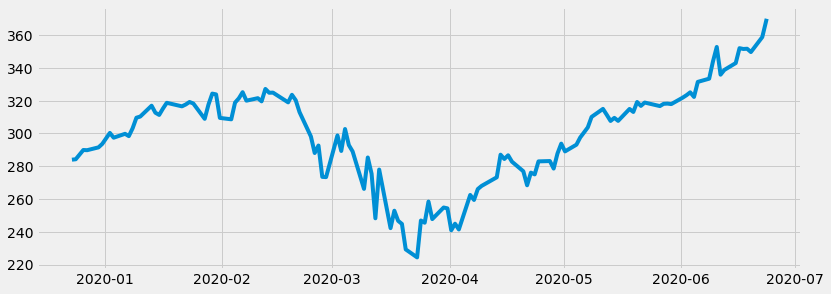

In [72]:
#ploting the values to the graph 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.timestamp, df.close, label="Close Price")
plt.xlabel("180 days", fontsize=18)
plt.ylabel("Close Price USD($)", fontsize=18)
plt.show()